In [1]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Converting .npy to seperated folders

In [2]:
X_train_temp = np.load('data/X_train.npy')
Y_train_temp = np.load('data/y_train.npy')
X_test_temp = np.load('data/X_test.npy')
Y_test_temp = np.load('data/Y_test.npy')

In [3]:
images = np.concatenate((X_train_temp, X_test_temp), axis=0)
labels = np.concatenate((Y_train_temp, Y_test_temp), axis=0)

In [4]:
class_names = ['Heavy damage', 'Minor damage', 'Moderate damage', 'Undamaged state']

In [5]:
images = (images - np.min(images)) / (np.max(images) - np.min(images))

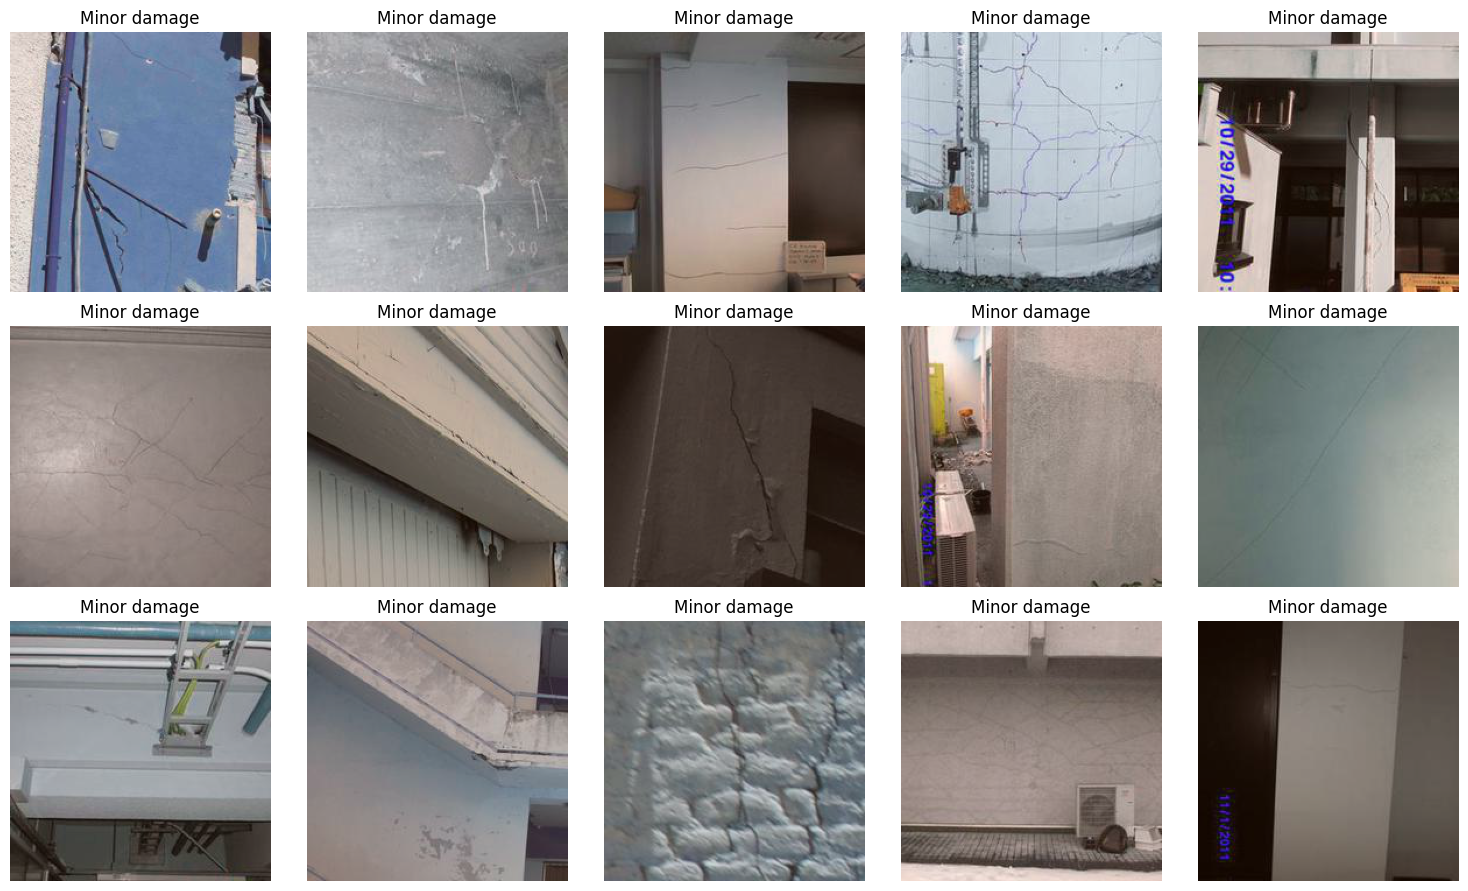

In [6]:
num_images_to_show = 15  
images_per_row = 5  
offset = 1000 # dataset starting offset

num_rows = (num_images_to_show + images_per_row - 1) // images_per_row 

plt.figure(figsize=(15, 3 * num_rows))
for i in range(min(offset, len(images) - 1), min(offset + num_images_to_show, len(images))):
    plt.subplot(num_rows, images_per_row, i + 1 - offset)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
# counts per each class
def print_counts(class_names,labels):
    class_counts = {class_name: int(np.sum(labels[:, i])) for i, class_name in enumerate(class_names)}

    for class_name, count in class_counts.items():
        print(f"{class_name}: {count} images")

In [7]:
print_counts(class_names,labels)

Heavy damage: 1013 images
Minor damage: 962 images
Moderate damage: 903 images
Undamaged state: 1758 images


In [ ]:
# separate images into it's class

main_folder = 'data_separated'

if not os.path.exists(main_folder):
    os.makedirs(main_folder)


for i in range(len(images)):
    img = Image.fromarray((images[i] * 255).astype(np.uint8))  # normalized to unnormalized
    label_index = np.argmax(labels[i]) 
    class_folder = os.path.join(main_folder, class_names[label_index])  

    if not os.path.exists(class_folder):
        os.makedirs(class_folder)

    img.save(os.path.join(class_folder, f'image_{i}.png'))

print("Resimler ilgili klasörlere kaydedildi.")

### Splitting the .npy dataset

In [ ]:
X_train_temp = np.load('data/X_train.npy')
Y_train_temp = np.load('data/y_train.npy')
X_test_temp = np.load('data/X_test.npy')
Y_test_temp = np.load('data/Y_test.npy')

In [ ]:
images = np.concatenate((X_train_temp, X_test_temp), axis=0)
labels = np.concatenate((Y_train_temp, Y_test_temp), axis=0)

In [8]:
# One-hot encoded to single label
labels_indices = np.argmax(labels, axis=1)

X_train, X_temp, Y_train, Y_temp = train_test_split(images, labels_indices, test_size=0.3, random_state=42, stratify=labels_indices)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=1/3, random_state=42, stratify=Y_temp)

# unnormalize
X_train = (X_train * 255).astype(np.uint8)
X_val = (X_val * 255).astype(np.uint8)
X_test = (X_test * 255).astype(np.uint8)

base_dir = 'data_splitted'
splits = ['train', 'val', 'test']
data = [(X_train, Y_train), (X_val, Y_val), (X_test, Y_test)]

for split, (images, labels) in zip(splits, data):
    for i, class_name in enumerate(class_names):
        folder_path = os.path.join(base_dir, split, class_name)
        os.makedirs(folder_path, exist_ok=True)  
        class_indices = np.where(labels == i)[0] 
        for idx in class_indices:
            img = Image.fromarray(images[idx])
            img.save(os.path.join(folder_path, f'image_{idx}.png'))

print("Succesfull")

Veriler ilgili klasörlere ayrıldı ve kaydedildi.
